In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


2024-08-17 07:12:55.374904: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 07:12:55.375051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 07:12:55.547282: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


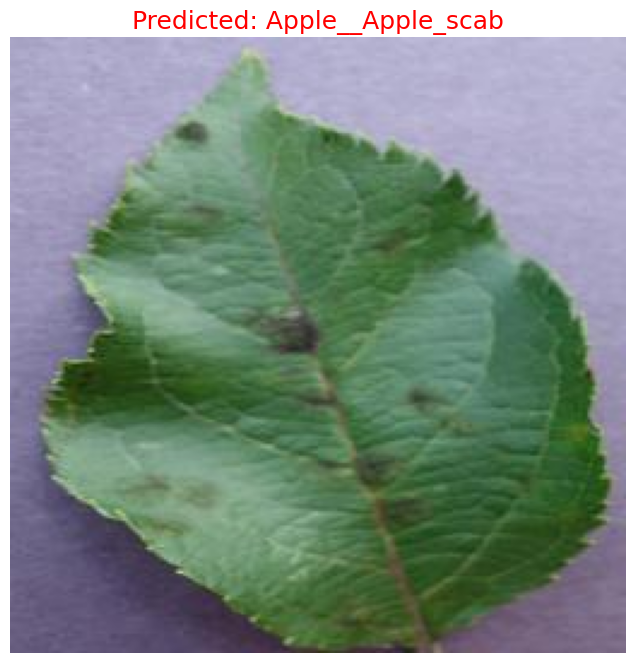

Predicted class: Apple__Apple_scab
Disease details: To control Apple Scab, apply fungicides labeled for apple scab control. Additionally, prune and remove infected leaves.


In [6]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/kaggle/input/plant/tensorflow2/default/1/CNN_TRAINED_MODEL.tflite")  # Adjust the path if necessary
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Class labels
class_labels = ['Apple__Apple_scab', 'Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple__healthy',
                'Blueberry__healthy', 'Cherry(including_sour)healthy', 'Cherry(including_sour)_Powdery_mildew',
                'Corn_(maize)Cercospora_leaf_spot Gray_leaf_spot', 'Corn(maize)Common_rust', 'Corn_(maize)_healthy',
                'Corn_(maize)Northern_Leaf_Blight', 'Grape_Black_rot', 'Grape__Esca(Black_Measles)', 
                'Grape__healthy', 'Grape_Leaf_blight(Isariopsis_Leaf_Spot)', 'Orange__Haunglongbing(Citrus_greening)', 
                'Peach__Bacterial_spot', 'Peach_healthy', 'Pepper,_bell_Bacterial_spot', 'Pepper,_bell__healthy', 
                'Potato__Early_blight', 'Potato_healthy', 'Potato_Late_blight', 'Raspberry__healthy', 
                'Soybean__healthy', 'Squash_Powdery_mildew', 'Strawberry_healthy', 'Strawberry__Leaf_scorch', 
                'Tomato__Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato__Late_blight', 
                'Tomato__Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato__Spider_mites Two-spotted_spider_mite', 
                'Tomato__Target_Spot', 'Tomato_Tomato_mosaic_virus', 'Tomato__Tomato_Yellow_Leaf_Curl_Virus']

# Disease details dictionary
disease_details = {
    'Apple__Apple_scab': "To control Apple Scab, apply fungicides labeled for apple scab control. Additionally, prune and remove infected leaves.",
    'Apple___Black_rot': "For Black Rot in Apple trees, apply fungicides and practice good sanitation by promptly removing and destroying infected plant material.",
    'Apple__Cedar_apple_rust': "To manage Cedar Apple Rust, use fungicide treatments and consider removing cedar trees in the vicinity as they act as alternate hosts.",
    'Apple___healthy': "No specific treatment required for healthy apple trees.",
    'Blueberry___healthy': "No specific treatment required for healthy blueberry plants.",
    'Cherry_(including_sour)_healthy': "No specific treatment required for healthy cherry plants.",
    'Cherry_(including_sour)___Powdery_mildew': "To control Powdery Mildew in cherries, apply fungicides and maintain good air circulation.",
    'Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot': "To manage Cercospora Leaf Spot and Gray Leaf Spot in corn, rotate crops and use fungicides.",
    'Corn_(maize)Common_rust': "For Common Rust in corn, use resistant varieties and apply fungicides if necessary.",
    'Corn_(maize)_healthy': "No specific treatment required for healthy corn plants.",
    'Corn_(maize)_Northern_Leaf_Blight': "To control Northern Leaf Blight in corn, practice crop rotation and use resistant varieties.",
    'Grape___Black_rot': "For Black Rot in grapes, apply fungicides and practice good sanitation by removing infected plant parts.",
    'Grape___Esca(Black_Measles)': "To manage Esca (Black Measles) in grapes, prune infected vines and apply appropriate fungicides.",
    'Grape___healthy': "No specific treatment required for healthy grapevines.",
    'Grape___Leaf_blight(Isariopsis_Leaf_Spot)': "To control Leaf Blight in grapes, apply fungicides labeled for grape diseases.",
    'Orange___Haunglongbing(Citrus_greening)': "There is no cure for Huanglongbing (Citrus Greening). Remove infected trees to prevent the spread.",
    'Peach___Bacterial_spot': "For Bacterial Spot in peaches, apply copper-based sprays and prune infected branches.",
    'Peach___healthy': "No specific treatment required for healthy peach trees.",
    'Pepper,bell__Bacterial_spot': "For Bacterial Spot in bell peppers, apply copper-based sprays and avoid overhead irrigation.",
    'Pepper,bell__healthy': "No specific treatment required for healthy bell pepper plants.",
    'Potato___Early_blight': "To control Early Blight in potatoes, apply fungicides, practice crop rotation, and use disease-free seed potatoes.",
    'Potato___healthy': "No specific treatment required for healthy potato plants.",
    'Potato___Late_blight': "For Late Blight in potatoes, apply fungicides and avoid overhead irrigation.",
    'Raspberry___healthy': "No specific treatment required for healthy raspberry plants.",
    'Soybean___healthy': "No specific treatment required for healthy soybean plants.",
    'Squash___Powdery_mildew': "To control Powdery Mildew in squash, apply fungicides and maintain good air circulation.",
    'Strawberry___healthy': "No specific treatment required for healthy strawberry plants.",
    'Strawberry___Leaf_scorch': "To manage Leaf Scorch in strawberries, maintain good air circulation and remove infected leaves.",
    'Tomato___Bacterial_spot': "For Bacterial Spot in tomatoes, apply copper-based sprays and avoid overhead irrigation.",
    'Tomato___Early_blight': "To control Early Blight in tomatoes, apply fungicides, practice crop rotation, and use disease-free seedlings.",
    'Tomato___healthy': "No specific treatment required for healthy tomato plants.",
    'Tomato___Late_blight': "For Late Blight in tomatoes, apply fungicides and avoid overhead irrigation.",
    'Tomato___Leaf_Mold': "To manage Leaf Mold in tomatoes, apply fungicides and maintain good air circulation.",
    'Tomato___Septoria_leaf_spot': "For Septoria Leaf Spot in tomatoes, apply fungicides labeled for tomato diseases.",
    'Tomato___Spider_mites Two-spotted_spider_mite': "To control Spider Mites in tomatoes, use miticides and maintain a clean growing environment.",
    'Tomato___Target_Spot': "For Target Spot in tomatoes, apply fungicides labeled for tomato diseases.",
    'Tomato___Tomato_mosaic_virus': "There is no cure for Tomato Mosaic Virus. Remove infected plants to prevent the spread.",
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': "To manage Tomato Yellow Leaf Curl Virus, use disease-resistant varieties and control whiteflies.",
}

# Load and preprocess the input image
def load_and_preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    original_image = image.copy()  # Keep the original image for display
    image = image.resize(target_size)
    image = np.array(image).astype('float32') / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image, original_image

# Example usage
image_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"  # Adjust the path to your test image
target_size = (input_details[0]['shape'][1], input_details[0]['shape'][2])  # Assuming model input is (1, height, width, channels)
input_image, original_image = load_and_preprocess_image(image_path, target_size)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_image)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class_index = np.argmax(output_data, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]

# Display the image with the predicted label
plt.figure(figsize=(8, 8))
plt.imshow(original_image)
plt.title(f"Predicted: {predicted_class_label}", fontsize=18, color='red')
plt.axis('off')
plt.show()

# Print disease details
print(f"Predicted class: {predicted_class_label}")
print(f"Disease details: {disease_details.get(predicted_class_label, 'No details available.')}")